<a href="https://colab.research.google.com/github/elmox0818/ai_learning/blob/master/RNN_END.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNN(リカレントニューラルネットワーク)

- 中間層が時系列で繋がっていて、重みやバイアスが持ち越されるため過去の情報を使える
- 勾配爆発
  - 学習時に層をさかのぼるにつれて勾配が大きくなりすぎる問題。勾配クリッピングなどで対処する。
- 勾配消失
  - 勾配が小さくなりすぎる問題。LSTMなどが有効。

## 勾配クリッピング

勾配の大きさに制限をかける。
L2ノルムが閾値より高い場合、以下の式で調整する。
> L2ノルム = 二乗の総和の平方根

$$
  勾配 → \frac{閾値}{L2ノルム}\times勾配
$$


## Kerasの基礎

### 学習用データの用意

Using matplotlib backend: agg


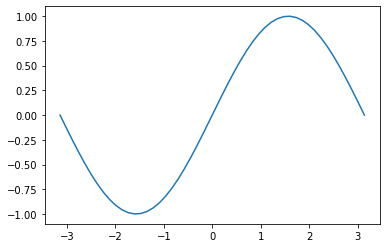

In [6]:
%matplotlib

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-np.pi, np.pi).reshape(-1, 1)
t = np.sin(x)

plt.plot(x, t)
plt.show()

## ニューラルネットワークの構築

Sequential()によりモデルを作成、addメソッドにより層を追加。
Dense()により通常の層を作ることができる。

In [8]:
from keras.models import Sequential
from keras.layers import Dense

batch_size = 8  # バッチサイズ
n_in = 1  # 入力層のニューロン数
n_mid = 20  # 中間層のニューロン数
n_out = 1  # 出力層のニューロン数

# 入力層、中間層、出力層の３層のニューラルネットワークを構築
model = Sequential()
model.add(Dense(n_mid, input_shape=(n_in,), activation="sigmoid"))  # 活性化関数にシグモイド関数
model.add(Dense(n_out, activation="linear"))  # 活性化関数に恒等関数
model.compile(loss="mean_squared_error", optimizer="sgd")  # 損失関数に二乗誤差、最適化アルゴリズムにSGDを使用してコンパイル
print(model.summary())




Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                40        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________
None


## 学習

fit()メソッドを使う

In [9]:
history = model.fit(x, t, batch_size=batch_size, epochs=2000, validation_split=0.1) # 10%のデータを検証用に使う




Train on 45 samples, validate on 5 samples
Epoch 1/2000





45/45 [==============================] - 1s 12ms/step - loss: 0.5165 - val_loss: 0.0559
Epoch 2/2000
45/45 [==============================] - 0s 259us/step - loss: 0.4132 - val_loss: 0.0431
Epoch 3/2000
45/45 [==============================] - 0s 241us/step - loss: 0.3718 - val_loss: 0.0574
Epoch 4/2000
45/45 [==============================] - 0s 223us/step - loss: 0.3395 - val_loss: 0.0529
Epoch 5/2000
45/45 [==============================] - 0s 208us/step - loss: 0.3140 - val_loss: 0.0674
Epoch 6/2000
45/45 [==============================] - 0s 231us/step - loss: 0.3021 - val_loss: 0.0720
Epoch 7/2000
45/45 [==============================] - 0s 251us/step - loss: 0.2838 - val_loss: 0.1067
Epoch 8/2000
45/45 [==============================] - 0s 259us/step - loss: 0.2605 - val_loss: 0.1259
Epoch 9/2000
45/45 [==============================] - 0s 238us/step - loss: 0.2499 - val_loss: 0.1665
Epoch 10/2000
45/45 [===========

## 学習の推移

学習を表示する

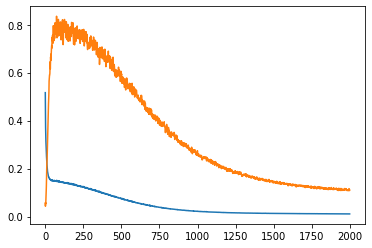

In [11]:
loss = history.history['loss'] # 訓練用データの誤差
vloss = history.history['val_loss'] # 検証用データの誤差

plt.plot(np.arange(len(loss)), loss)
plt.plot(np.arange(len(vloss)), vloss)
plt.show()

### モデルの使用

predict()メソッドによる予測を行う。

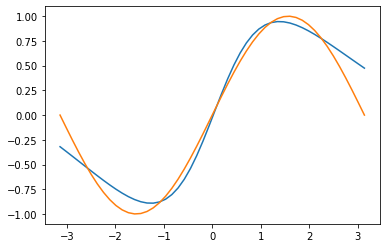

In [12]:
plt.plot(x, model.predict(x))
plt.plot(x, t)
plt.show()

### 課題

コサイン関数の場合

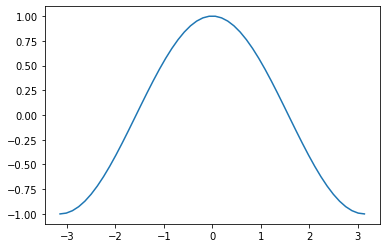

In [14]:
x = np.linspace(-np.pi, np.pi).reshape(-1, 1)
t = np.cos(x)

plt.plot(x, t)
plt.show()

In [15]:
history = model.fit(x, t, batch_size=batch_size, epochs=500, validation_split=0.1) # 10%のデータを検証用に使う

Train on 45 samples, validate on 5 samples
Epoch 1/500
45/45 [==============================] - 0s 385us/step - loss: 0.9072 - val_loss: 2.0474
Epoch 2/500
45/45 [==============================] - 0s 264us/step - loss: 0.8319 - val_loss: 1.9904
Epoch 3/500
45/45 [==============================] - 0s 210us/step - loss: 0.7865 - val_loss: 1.6231
Epoch 4/500
45/45 [==============================] - 0s 243us/step - loss: 0.7575 - val_loss: 1.5553
Epoch 5/500
45/45 [==============================] - 0s 245us/step - loss: 0.7091 - val_loss: 1.4858
Epoch 6/500
45/45 [==============================] - 0s 241us/step - loss: 0.6891 - val_loss: 1.3382
Epoch 7/500
45/45 [==============================] - 0s 199us/step - loss: 0.6740 - val_loss: 1.1482
Epoch 8/500
45/45 [==============================] - 0s 225us/step - loss: 0.6642 - val_loss: 1.1343
Epoch 9/500
45/45 [==============================] - 0s 213us/step - loss: 0.6546 - val_loss: 1.0112
Epoch 10/500
45/45 [============================

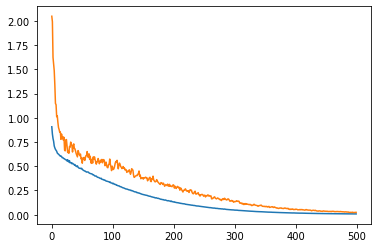

In [16]:
loss = history.history['loss'] # 訓練用データの誤差
vloss = history.history['val_loss'] # 検証用データの誤差

plt.plot(np.arange(len(loss)), loss)
plt.plot(np.arange(len(vloss)), vloss)
plt.show()

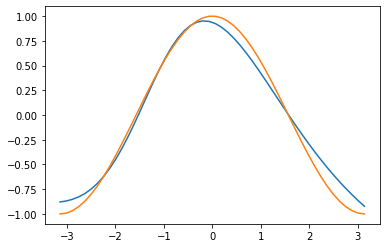

In [17]:
plt.plot(x, model.predict(x))
plt.plot(x, t)
plt.show()

# RNN実装

## 訓練用データ作成


(40, 10, 1)
(40, 10, 1)


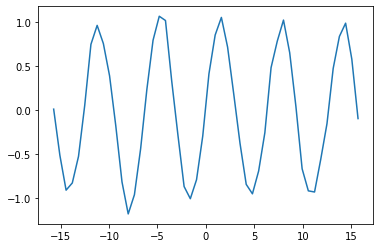

In [33]:
import numpy as np
import matplotlib.pyplot as plt

x_data = np.linspace(-5*np.pi, 5*np.pi)
sin_data = np.sin(x_data) + 0.1*np.random.randn(len(x_data)) # sin関数にノイズを加える

plt.plot(x_data, sin_data)
plt.show()

n_rnn = 10 # 時系列の数
n_sample = len(x_data)-n_rnn # サンプル数
x = np.zeros((n_sample, n_rnn)) # 入力数
t = np.zeros((n_sample, n_rnn)) # 正解

for i in range(0, n_sample):
  x[i] = sin_data[i:i+n_rnn]
  t[i] = sin_data[i+1:i+n_rnn+1] # 時系列を入力よりも一つ後にずらす、これが正解のデータ

x = x.reshape(n_sample, n_rnn, 1) # KerasによるRNNは入力を（サンプル数、時系列の数、入力層のニューロン数）にする
print(x.shape)
t = t.reshape(n_sample, n_rnn, 1) # 入力と同じ形状
print(t.shape)


In [34]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

batch_size = 8 # バッチサイズ
n_in = 1 # 入力層のニューロン数
n_mid = 20 # 中間層のニューロン数
n_out = 1 # 出力層のニューロン数

model = Sequential()
# SimpleRNN層の追加。return_sequenceをTrueにすると、時系列の全てのRNN層が出力を返す。
# return_sequenceをTrueをFalseにすると、最後のRNN層のみが出力を返す。
model.add(SimpleRNN(n_mid, input_shape=(n_rnn, n_in), return_sequences=True))
model.add(Dense(n_out, activation="linear"))
model.compile(loss="mean_squared_error", optimizer="sgd")  # 誤差は二乗誤差、最適化アルゴリズムはSGD
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 10, 20)            440       
_________________________________________________________________
dense_4 (Dense)              (None, 10, 1)             21        
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________
None


In [35]:
# 学習
history = model.fit(x, t, epochs=100, batch_size=batch_size, validation_split=0.1)

Train on 36 samples, validate on 4 samples
Epoch 1/100
36/36 [==============================] - 0s 9ms/step - loss: 0.2591 - val_loss: 0.1851
Epoch 2/100
36/36 [==============================] - 0s 588us/step - loss: 0.1952 - val_loss: 0.1560
Epoch 3/100
36/36 [==============================] - 0s 536us/step - loss: 0.1687 - val_loss: 0.1405
Epoch 4/100
36/36 [==============================] - 0s 536us/step - loss: 0.1544 - val_loss: 0.1313
Epoch 5/100
36/36 [==============================] - 0s 552us/step - loss: 0.1442 - val_loss: 0.1295
Epoch 6/100
36/36 [==============================] - 0s 508us/step - loss: 0.1355 - val_loss: 0.1238
Epoch 7/100
36/36 [==============================] - 0s 491us/step - loss: 0.1288 - val_loss: 0.1212
Epoch 8/100
36/36 [==============================] - 0s 561us/step - loss: 0.1224 - val_loss: 0.1163
Epoch 9/100
36/36 [==============================] - 0s 455us/step - loss: 0.1172 - val_loss: 0.1106
Epoch 10/100
36/36 [==============================

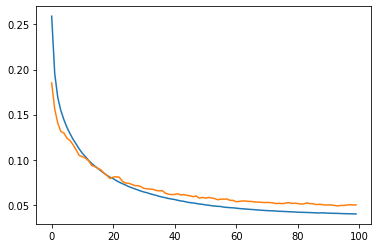

In [36]:
# 誤差の推移を確認
loss = history.history['loss']
vloss = history.history['val_loss']

plt.plot(np.arange(len(loss)), loss)
plt.plot(np.arange(len(vloss)), vloss)
plt.show()

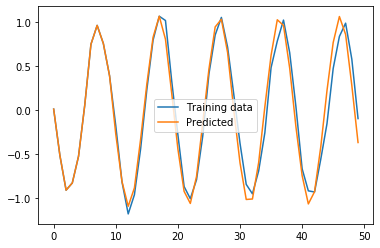

In [37]:
# 予測

predicted = x[0].reshape(-1) # 最初の入力。reshape(-1)で一次元のベクトルにする
for i in range(0, n_sample):
  y = model.predict(predicted[-n_rnn:].reshape(1, n_rnn, 1)) # 直近のデータを取り出してreshapeして予測に渡す
  predicted = np.append(predicted, y[0][n_rnn-1][0]) # 出力の最後の結果をpredictedに追加する。
plt.plot(np.arange(len(sin_data)), sin_data, label="Training data")
plt.plot(np.arange(len(predicted)), predicted, label="Predicted")
plt.legend()
plt.show()

時系列xが進むにつれて乖離が生じている。